Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the black friday dataset into a data frame

In [2]:
df = pd.read_csv('BlackFridaySale.csv')

Display header rows and description of the loaded dataset

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,NaN,2,0,12,14.0,5.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
count,2.100000e+01,21.000000,21.000000,21.000000,15.000000,12.000000,21.000000
mean,1.000004e+06,12.047619,0.523810,4.428571,9.133333,11.416667,9912.809524
std,2.226464e+00,5.444963,0.511766,3.668398,5.111146,5.017394,5785.918774
min,1.000001e+06,1.000000,0.000000,1.000000,2.000000,4.000000,1057.000000
25%,1.000003e+06,9.000000,0.000000,1.000000,5.000000,5.000000,5378.000000
50%,1.000005e+06,10.000000,1.000000,4.000000,8.000000,14.000000,8584.000000
75%,1.000006e+06,16.000000,1.000000,8.000000,14.000000,14.250000,15227.000000
max,1.000008e+06,20.000000,1.000000,12.000000,16.000000,17.000000,19614.000000


Remove unnecessary features from the dataset such as 'User_ID', 'Product_ID', 'Stay_In_Current_City_Years'

In [5]:
df.drop(['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
0,F,0-17,10,A,0,3,NaN,NaN,8370
1,F,0-17,10,A,0,1,6.0,14.0,15200
2,F,0-17,10,A,0,12,NaN,NaN,1422
3,F,0-17,10,NaN,0,12,14.0,5.0,1057
4,M,55+,16,C,0,8,NaN,NaN,7969


Manipulate data by replacing empty column values in 'City_Category' with a default value for the city.

In [6]:
df['City_Category'] = df['City_Category'].fillna('A')
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball_Caps,Wine_Tumblers,Pet_Raincoats,Purchase
0,F,0-17,10,A,0,3,NaN,NaN,8370
1,F,0-17,10,A,0,1,6.0,14.0,15200
2,F,0-17,10,A,0,12,NaN,NaN,1422
3,F,0-17,10,A,0,12,14.0,5.0,1057
4,M,55+,16,C,0,8,NaN,NaN,7969


Visualisations

In [7]:
df['Wine_Tumblers'] = df['Wine_Tumblers'].fillna(0)
df['Baseball_Caps'] = df['Baseball_Caps'].fillna(0)
intervals = [-100, 0.5, 1000]
labels = ['not both', 'bought both']
df['final'] = pd.cut(df.Baseball_Caps * df.Wine_Tumblers, intervals, labels=labels)

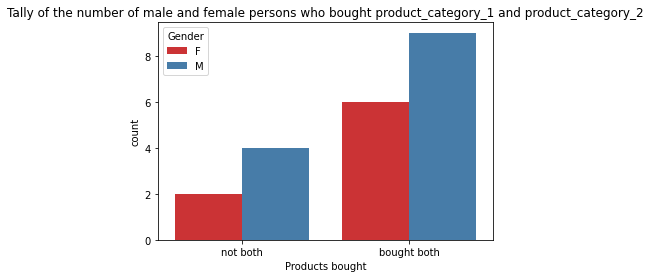

In [8]:
ax = sns.countplot(x='final', hue='Gender', palette='Set1', data=df)
ax.set(title='Tally of the number of male and female persons who bought product_category_1 and product_category_2', xlabel='Products bought', ylabel='count')
plt.show()

Total number of male and female persons belonging to each city category

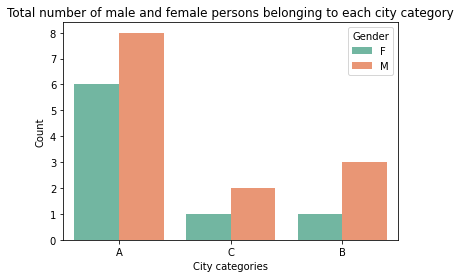

In [9]:
ax = sns.countplot(x='City_Category', hue='Gender', palette='Set2', data=df)
ax.set(title='Total number of male and female persons belonging to each city category', xlabel='City categories', ylabel='Count')
plt.show()